In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [3]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-09\data2\lev_09_mp.parquet"

pdf = pl.read_parquet(path)
pdf.collect_schema()

Schema([('Survey_Name', String),
        ('Year', String),
        ('FSU_Serial_No', String),
        ('Sector', String),
        ('State', String),
        ('NSS_Region', String),
        ('District', String),
        ('Stratum', String),
        ('Sub_stratum', String),
        ('Panel', String),
        ('Sub_sample', String),
        ('FOD_Sub_Region', String),
        ('Sample_SU_No', String),
        ('Sample_Sub_Division_No', String),
        ('Second_Stage_Stratum_No', String),
        ('Sample_Household_No', String),
        ('Questionnaire_No', String),
        ('Level', String),
        ('Item_Code_9_1_to_11_4', String),
        ('Value_Rs_9_1_to_11_4', Int64),
        ('Multiplier', Int64)])

In [4]:
cols = [
    'State',
    'Item_Code_9_1_to_11_4',
    'Value_Rs_9_1_to_11_4',
]

pdf = pdf [cols]


In [5]:
pdf = pdf.filter(
    pl.col('State') == '23'
)

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

'Desire Filter shape (915790, 3)'

In [6]:
print(f"Number of unique Item code present {pdf['Item_Code_9_1_to_11_4'].n_unique()}")

Number of unique Item code present 98


In [7]:
pdf.estimated_size(unit='mb')

5.349366188049316

In [8]:
pdf.columns

['State', 'Item_Code_9_1_to_11_4', 'Value_Rs_9_1_to_11_4']

In [9]:
pdf.estimated_size(unit='mb')

5.349366188049316

In [10]:
df = pdf.to_pandas()

In [11]:
df['Item_Code_9_1_to_11_4'].unique()

array([ 17,  23, 400, 404, 405, 410, 411, 412, 413, 420, 422, 450, 451,
       453, 456, 466, 468, 483, 486, 488, 500, 512, 899,  18, 452, 460,
       485,  20,  22,  24, 492, 501, 414, 454, 471, 504, 421, 423, 435,
       462, 467, 470, 472, 506, 510, 455, 437, 464, 496, 461, 465,  21,
       457, 408, 494, 424, 505, 514, 522, 497, 508, 539, 540, 406, 520,
       513, 401, 402, 480, 438, 511,  25, 430,  28, 482, 484, 490, 433,
       493, 495, 463,  16, 487,  27,  26, 481, 523, 521, 503, 409, 419,
       429, 459, 479, 499, 519, 439, 529], dtype=int16)

In [12]:
extracted_item_codes = {
    17: "hair oil, hair colour",
    23: "LED bulb, CFL bulbs",
    400: "books, journals (incl. e-books, audio books): first hand",
    404: "stationery, photocopying charges",
    405: "tuition and other fees (school, college, etc.)",
    410: "medicine",
    411: "X-ray, ECG, pathological test, etc.",
    412: "doctor's/surgeon's fee",
    413: "hospital & nursing home charges",
    420: "medicine",
    422: "doctor's/surgeon's fee",
    450: "toilet soap, body-wash, hand-wash, shower gel, face-wash",
    451: "toothpaste, mouthwash, toothbrush, etc.",
    453: "shampoo, conditioner, hair serum/gel, hair cream",
    456: "sanitary napkins",
    466: "washing soap/soda/powder/liquid detergent",
    468: "incense (agarbatti), room freshener",
    483: "barber, beautician, spas, etc.",
    486: "grinding/husking charges, etc.",
    488: "telephone charges: mobile (incl. data charges if not separable)",
    500: "bus/tram fare: occasional",
    512: "petrol for vehicle",
    899: "other consumer taxes & cesses",
    18: "other hair products, accessories, comb, etc.",
    452: "powder, cream, body lotion, moisturizers",
    460: "other electric bulb, tubelight, decorative lights",
    485: "tailor",
    20: "other beauty products (lipstick, nail polish, compact, foundation, eye makeup kit, etc.)",
    22: "baby products (diapers, lotion, powder, etc.)",
    24: "railway fare",
    492: "priest",
    501: "auto-rickshaw/e-rickshaw fare",
    414: "other medical expenses",
    454: "shaving blades, shaving stick, razor",
    471: "mosquito repellent, insecticide, anti-rodent, etc.",
    504: "bus fare for school, college, etc.: periodic (lumpsum) payment",
    421: "X-ray, ECG, pathological test, etc.",
    423: "family planning devices",
    435: "photography",
    462: "earthenware, paperware, thermocol plates, etc.",
    467: "other washing requisites",
    470: "flower (fresh): all purposes",
    472: "other petty articles like coir, rope, door mat, non-durable electric goods, etc.",
    506: "bus/tram fare for school, college: daily (miscellaneous) payments",
    510: "car/bus hired for ceremonial occasion, picnic, etc.",
    455: "shaving cream, shaving foam, aftershave lotion, aftershave balm",
    437: "cable TV/DTH/set top box (incl. broadband charges if not separable)",
    464: "bucket & other plastic goods",
    496: "internet expenses (cable broadband, mobile data charges, etc. if separable)",
    461: "electric batteries",
    465: "floor cleaner, acid, toilet cleaner",
    21: "perfume, body spray, deodorant, roll-ons, etc.",
    457: "other toilet articles (body oil, make-up brushes, etc.)",
    408: "other educational expenses (incl. fees for enrolment in web-based training, library charges, educational CD, etc.)",
    494: "repair charges for non-durables (electrician’s charges, plumbing charges, etc.)",
    424: "other medical expenses",
    505: "bus/tram fare for commuting to work: daily (miscellaneous) payments",
    514: "other conveyance expenses",
    522: "residential land rent",
    497: "other consumer services excluding conveyance (car parking charges, coolie/porter charges, toll charges, miscellaneous expenses, etc.)",
    508: "taxi fare",
    539: "house rent, garage rent (imputed)",
    540: "water charges",
    406: "private tutor/coaching centre",
    520: "house rent, garage rent (actual)",
    513: "diesel for vehicle",
    401: "books, journals, etc.: second hand",
    402: "newspapers, periodicals",
    480: "domestic helper/cook",
    438: "other entertainment (mela, fair, picnic, VCD/DVD hire, etc.)",
    511: "rickshaw (hand-drawn & cycle) fare",
    25: "bus fare for commuting to work: periodic (lumpsum) payment",
    430: "cinema, theatre",
    28: "online media service provider/streaming services",
    482: "sweeper",
    484: "washerman, laundry, ironing, dry cleaning, dyeing of clothes",
    490: "postage, couriers, fax & money order",
    433: "club, gym, swimming fees & other subscriptions",
    493: "legal expenses",
    495: "pet animals (incl. birds, fish)",
    463: "glassware",
    16: "sanitizer",
    487: "telephone charges: landline (incl. broadband charges if not separable)",
    27: "watchmen/security guard, driver",
    26: "steamer, boat fare",
    481: "attendant, babysitter",
    523: "other consumer rent",
    521: "hotel lodging charges",
    503: "air fare",
    409: "education: sub-total",
    419: "medical – hospitalisation: sub-total",
    429: "medical – non-hospitalisation: sub-total",
    459: "toilet articles: sub-total",
    479: "other household consumables: sub-total",
    499: "consumer services excluding conveyance: sub-total",
    519: "conveyance: sub-total",
    439: "entertainment: sub-total",
    529: "rent: sub-total"
}

In [13]:
df['category'] =  df['Item_Code_9_1_to_11_4'].map(extracted_item_codes)

In [14]:
df['Item_Code_9_1_to_11_4'].nunique()

98

In [15]:
df['Item_Code_9_1_to_11_4'].nunique() == df['category'].nunique()

False

In [16]:
df.columns

Index(['State', 'Item_Code_9_1_to_11_4', 'Value_Rs_9_1_to_11_4', 'category'], dtype='object')

In [17]:
category_df = df.groupby('category')[['Value_Rs_9_1_to_11_4']].agg(['sum', 'std', 'mean', 'count'])

category_df

Value_Rs_9_1_to_11_4  \
                                                                    sum   
category                                                                  
LED bulb, CFL bulbs                                           1311584.0   
X-ray, ECG, pathological test, etc.                          15422462.0   
air fare                                                        38000.0   
attendant, babysitter                                            3280.0   
auto-rickshaw/e-rickshaw fare                                 2345416.0   
...                                                                 ...   
tuition and other fees (school, college, etc.)              109107612.0   
washerman, laundry, ironing, dry cleaning, dyei...             456324.0   
washing soap/soda/powder/liquid detergent                     3510094.0   
watchmen/security guard, driver                                 22320.0   
water charges                                                 1236822.0   

                                                                              \
                                                            std         mean   
category                                                                       
LED bulb, CFL bulbs                                   77.713513   123.107190   
X-ray, ECG, pathological test, etc.                 4025.435873  2646.270075   
air fare                                            3359.894178  3800.000000   
attendant, babysitter                                432.904216   273.333333   
auto-rickshaw/e-rickshaw fare                        153.319471   166.838526   
...                                                         ...          ...   
tuition and other fees (school, college, etc.)      8751.591128  9825.973703   
washerman, laundry, ironing, dry cleaning, dyei...   186.975493   180.365217   
washing soap/soda/powder/liquid detergent             79.756861   125.773757   
watchmen/security guard, driver                      350.474192   272.195122   
water charges                                         62.186666   108.971101   

                                                           
                                                    count  
category                                                   
LED bulb, CFL bulbs                                 10654  
X-ray, ECG, pathological test, etc.                  5828  
air fare                                               10  
attendant, babysitter                                  12  
auto-rickshaw/e-rickshaw fare                       14058  
...                                                   ...  
tuition and other fees (school, college, etc.)      11104  
washerman, laundry, ironing, dry cleaning, dyei...   2530  
washing soap/soda/powder/liquid detergent           27908  
watchmen/security guard, driver                        82  
water charges                                       11350  

[94 rows x 4 columns]

# Largest

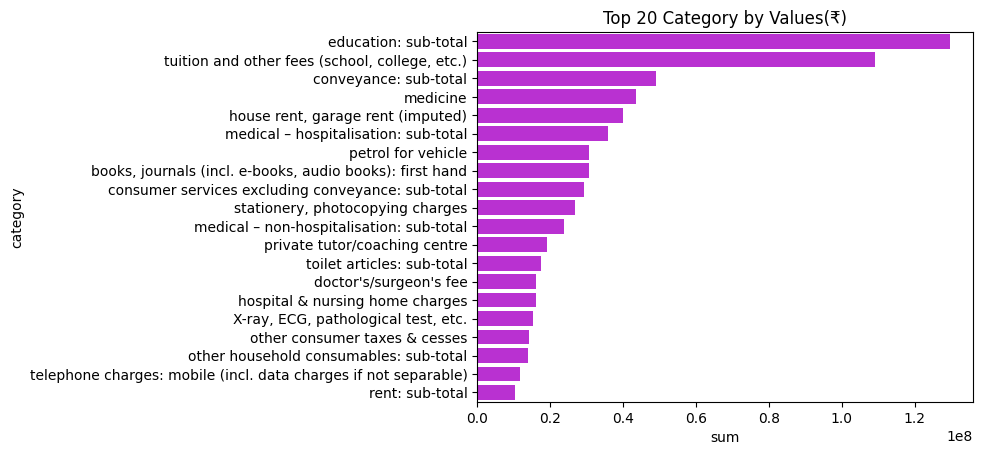

In [18]:
sns.barplot(category_df['Value_Rs_9_1_to_11_4']['sum'].nlargest(20), orient='h')
plt.title(f"Top 20 Category by Values(₹)")
plt.show()

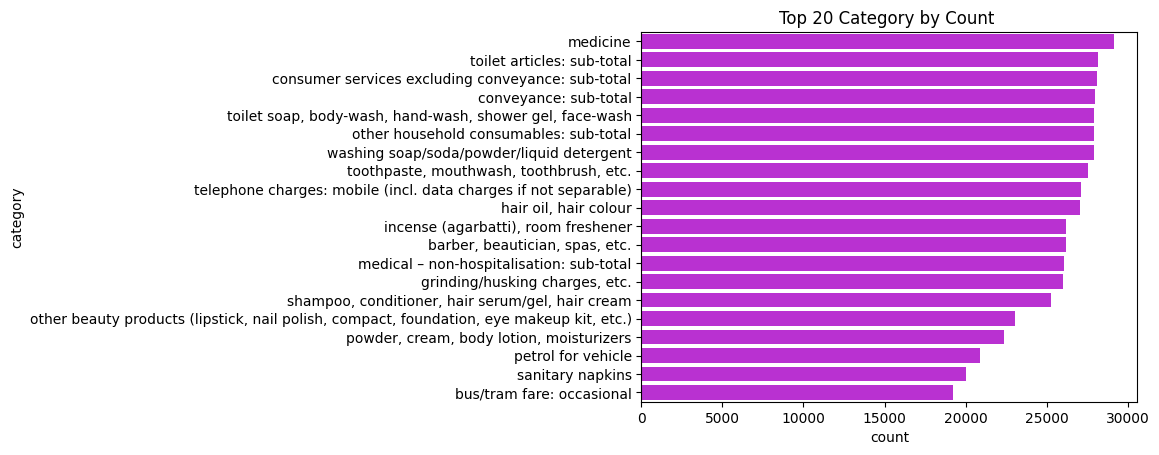

In [19]:
sns.barplot(category_df['Value_Rs_9_1_to_11_4']['count'].nlargest(20), orient='h')
plt.title(f"Top 20 Category by Count ")
plt.show()

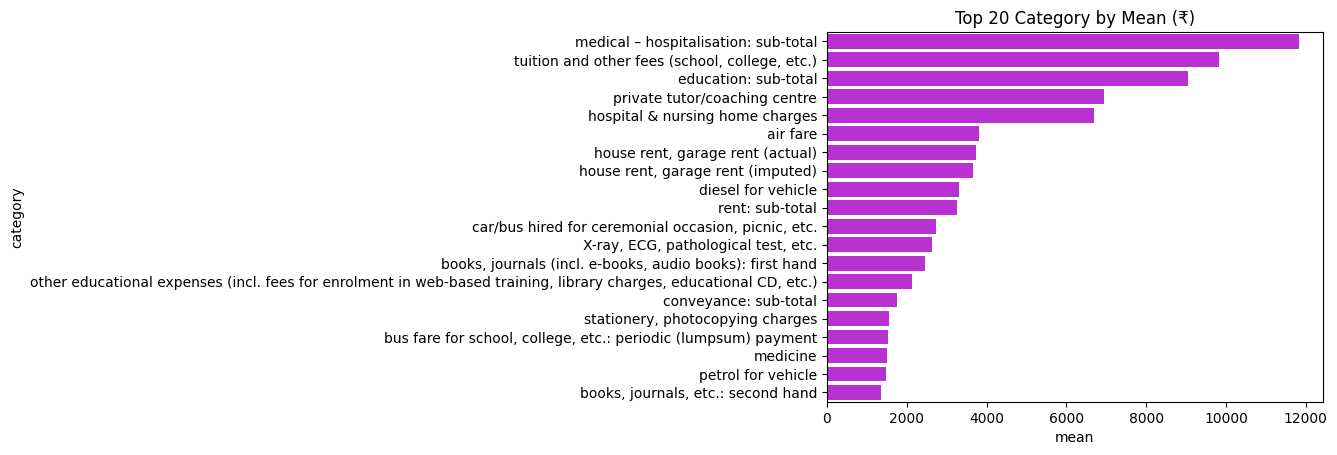

In [20]:
sns.barplot(category_df['Value_Rs_9_1_to_11_4']['mean'].nlargest(20), orient='h')
plt.title(f"Top 20 Category by Mean (₹)")
plt.show()

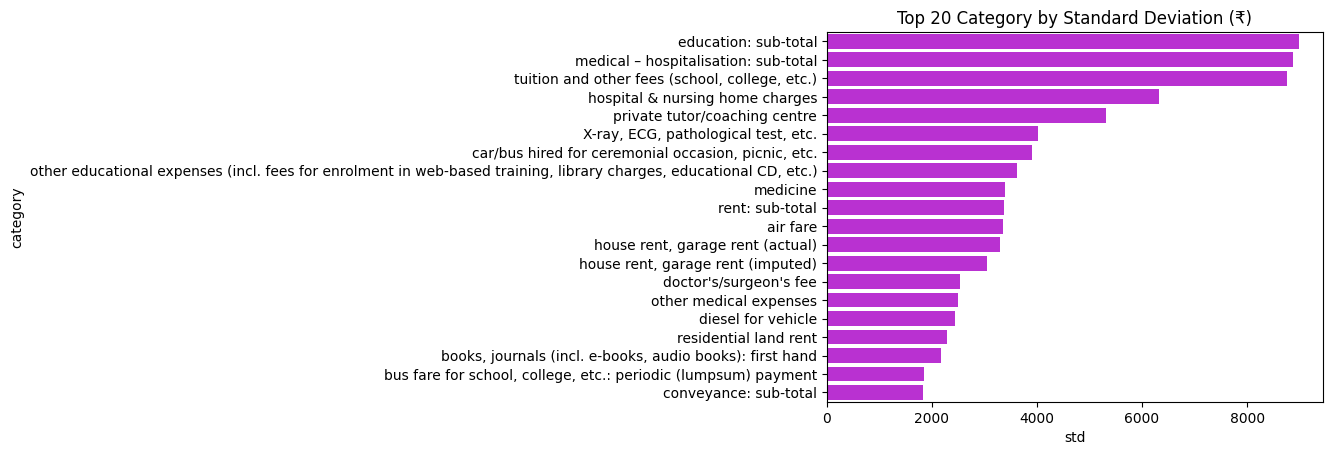

In [21]:
sns.barplot(category_df['Value_Rs_9_1_to_11_4']['std'].nlargest(20), orient='h')
plt.title(f"Top 20 Category by Standard Deviation (₹)")
plt.show()

# Smallest

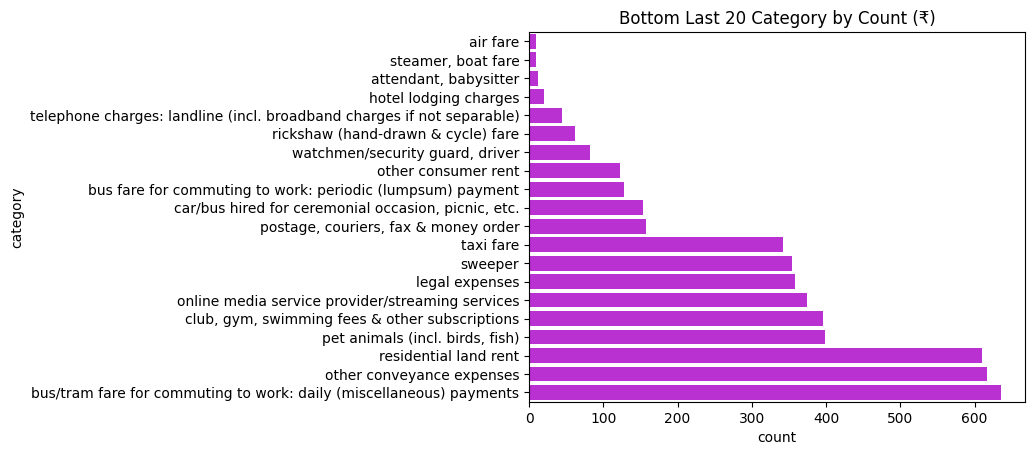

In [22]:
sns.barplot(category_df['Value_Rs_9_1_to_11_4']['count'].nsmallest(20), orient='h')
plt.title(f"Bottom Last 20 Category by Count (₹)")
plt.show()

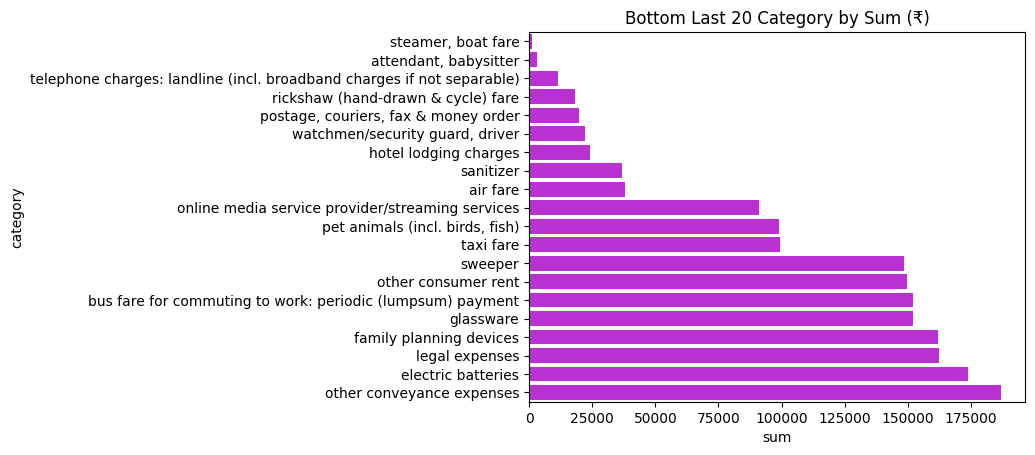

In [23]:
sns.barplot(category_df['Value_Rs_9_1_to_11_4']['sum'].nsmallest(20), orient='h')
plt.title(f"Bottom Last 20 Category by Sum (₹)")
plt.show()

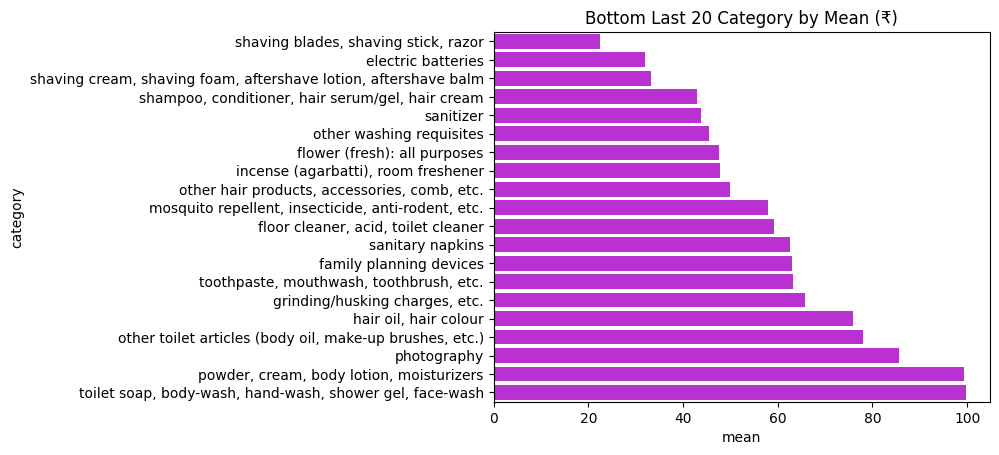

In [24]:
sns.barplot(category_df['Value_Rs_9_1_to_11_4']['mean'].nsmallest(20), orient='h')
plt.title(f"Bottom Last 20 Category by Mean (₹)")
plt.show()

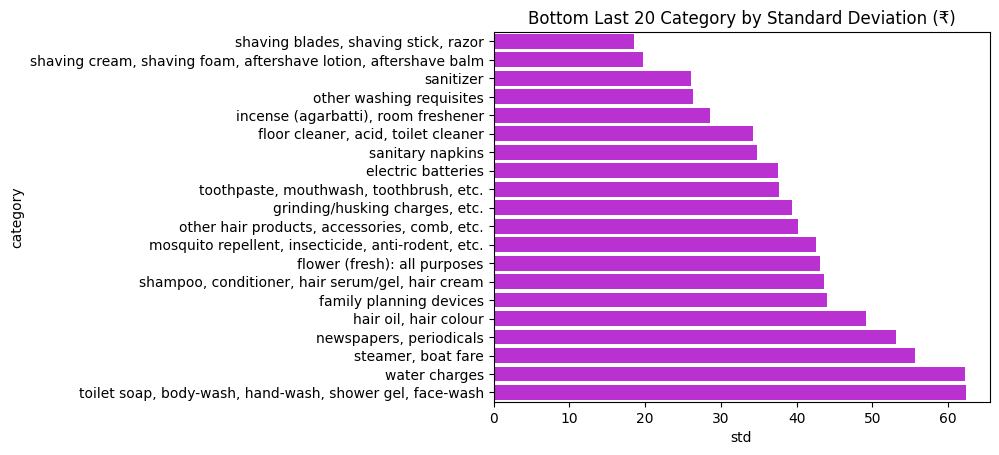

In [25]:
sns.barplot(category_df['Value_Rs_9_1_to_11_4']['std'].nsmallest(20), orient='h')
plt.title(f"Bottom Last 20 Category by Standard Deviation (₹)")
plt.show()

In [26]:
# Group and aggregate
category_df = df.groupby('category')[['Value_Rs_9_1_to_11_4']].agg(['sum', 'std', 'mean', 'count'])

# Flatten multi-level column names
category_df.columns = ['_'.join(col).strip() for col in category_df.columns.values]

# Save to CSV
category_df.to_csv('lev_09_category_summary.csv', index=True)

In [27]:
# category_df.to_csv('lev-09-category.csv', index=False)

In [28]:
# Done 🙌